# Zajęcia 11.01.2022r - Python

## 1). Import niezbędnych modułów

In [1]:
import pandas
import numpy
from matplotlib import pyplot

## 2). Wczytanie danych do analizy

In [3]:
data = pandas.read_csv('train.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.groupby("Sex").describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [12]:
data.groupby(['Sex', 'Pclass']).describe()['Survived']

count      mean       std  min  25%  50%  75%  max
Sex    Pclass                                                    
female 1        94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
       2        76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
       3       144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
male   1       122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
       2       108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
       3       347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0

In [14]:
type(data['Age'])

pandas.core.series.Series

In [15]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

(array([ 62., 102., 220., 167.,  89.,  48.,  19.,   7.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]),
 <BarContainer object of 8 artists>)

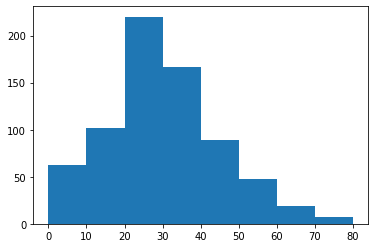

In [20]:
age_values = data['Age'].values
pyplot.hist(age_values, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

## 3). Czyszczenie danych

In [22]:
data_copy = data.drop(columns=["PassengerId", "SibSp", "Parch", "Ticket", "Cabin"])
data_copy.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [23]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [25]:
data_copy.dropna(inplace=True)

In [26]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


## 4). Analiza i wizualizacja danych

In [28]:
passenger_names = data_copy['Name'].values
# passenger_names

In [30]:
passenger_data_split = 'Braund, Mr. Owen Harris'.split(',')

In [33]:
title_and_names = passenger_data_split[1].split('.')

In [35]:
title_and_names[0].strip()

'Mr'

In [36]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0].strip()

'Mr'

In [41]:
titles = []
for passenger_name in passenger_names:
    titles.append(passenger_name.split(',')[1].split('.')[0].strip())

In [42]:
data_copy['Title'] = titles

In [43]:
data_copy.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Mr


In [44]:
data_copy.drop(columns=["Name"], inplace=True)

In [45]:
data_copy.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,male,22.0,7.2500,S,Mr
1,1,1,female,38.0,71.2833,C,Mrs
2,1,3,female,26.0,7.9250,S,Miss
3,1,1,female,35.0,53.1000,S,Mrs
4,0,3,male,35.0,8.0500,S,Mr


In [47]:
data_copy.groupby('Title').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Col,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Don,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Dr,6.0,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
Jonkheer,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
Lady,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Major,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Master,36.0,0.583333,0.500000,0.0,0.00,1.0,1.00,1.0
Miss,145.0,0.717241,0.451901,0.0,0.00,1.0,1.00,1.0


In [48]:
gender_values = data_copy['Sex'].values

In [52]:
gender_values_encoded = []
for gender_value in gender_values:
    if gender_value == 'male':
        gender_values_encoded.append(0)
    else:
        gender_values_encoded.append(1)

gender_values_encoded = [0 if gender_value=='male' else 1 for gender_value in gender_values]

In [54]:
data_copy['Sex'] = gender_values_encoded

In [55]:
data_copy.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,22.0,7.2500,S,Mr
1,1,1,1,38.0,71.2833,C,Mrs
2,1,3,1,26.0,7.9250,S,Miss
3,1,1,1,35.0,53.1000,S,Mrs
4,0,3,0,35.0,8.0500,S,Mr
